In [126]:
import pandas as pd
import pyodbc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



In [127]:
sales_go = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:/Users/Jonat/Downloads/GO-databases schoon/go_sales_schoon.accdb;')

In [128]:
product = pd.read_sql("SELECT * FROM product", sales_go)
product_type = pd.read_sql("SELECT * FROM product_type", sales_go)
return_item = pd.read_sql("SELECT DISTINCT * FROM returned_item", sales_go)
klant = pd.read_sql("SELECT * FROM sales_retailer_site", sales_go)
return_reason = pd.read_sql("SELECT * FROM return_reason", sales_go)
country = pd.read_sql("SELECT * FROM sales_country", sales_go)
order_details = pd.read_sql("SELECT * FROM order_details", sales_go)
order_header = pd.read_sql("SELECT * FROM order_header", sales_go)
order_method = pd.read_sql("SELECT * FROM order_method", sales_go)
product_line = pd.read_sql("SELECT * FROM product_line", sales_go)

C:\Users\Jonat\AppData\Local\Temp\ipykernel_11640\1052911171.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product = pd.read_sql("SELECT * FROM product", sales_go)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_11640\1052911171.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_type = pd.read_sql("SELECT * FROM product_type", sales_go)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_11640\1052911171.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return_item = pd.read_sql("SELECT DISTINCT * FROM returned_item", 

# Data merging

In [129]:
productfull = pd.merge(product, product_type)
productfull = pd.merge(productfull, product_line)
productfull 

,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN,PRODUCT_LINE_EN
0,53,10-1-2021,8,28.55,.28,P53ME2CA8.jpg,EN,Firefly Climbing Lamp,This climbing lamp is water-resistant. It come...,2,Climbing Accessories,Mountaineering Equipment
1,54,10-1-2021,8,35.33,.33,P54ME2CA8.jpg,EN,Firefly Charger,Power charger for the Firefly Climbing Lamp. T...,2,Climbing Accessories,Mountaineering Equipment
2,55,10-1-2021,8,4,.5,P55ME2CA8.jpg,EN,Firefly Rechargeable Battery,Rechargeable battery pack for the Firefly Clim...,2,Climbing Accessories,Mountaineering Equipment
3,56,10-1-2021,8,9,.5,P56ME2CA8.jpg,EN,Granite Chalk Bag,Nylon web bag perfect for holding several stic...,2,Climbing Accessories,Mountaineering Equipment
4,50,10-1-2021,8,2,.5,P50ME2CA8.jpg,EN,Granite Carabiner,Made from 12 mm rod stock aluminum and a radiu...,2,Climbing Accessories,Mountaineering Equipment
...,...,...,...,...,...,...,...,...,...,...,...,...
110,37,5-3-2013,5,28.75,.37,P37CE1LT5.jpg,EN,EverGlow Double,Light output approximates a 175 W bulb. Double...,1,Lanterns,Camping Equipment
111,38,5-3-2013,5,20,.33,P38CE1LT5.jpg,EN,EverGlow Kerosene,One of the most dependable sources of light in...,1,Lanterns,Camping Equipment
112,39,5-3-2013,5,40.63,.37,P39CE1LT5.jpg,EN,EverGlow Butane,Adjustable brightness control with auto igniti...,1,Lanterns,Camping Equipment
113,40,15-2-2011,5,17.97,.28,P40CE1LT5.jpg,EN,EverGlow Lamp,"Perfect for in your tent, this lamp comes with...",1,Lanterns,Camping Equipment


In [130]:
returnfull = pd.merge(return_item, return_reason)
returnfull = pd.merge(returnfull, order_details [['ORDER_DETAIL_CODE', 'QUANTITY']])
returnfull = pd.merge(returnfull, order_details[['ORDER_DETAIL_CODE', 'PRODUCT_NUMBER']])
returnfull = pd.merge(returnfull, productfull)
returnfull

,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY,RETURN_DESCRIPTION_EN,QUANTITY,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN,PRODUCT_LINE_EN
0,1491,1-8-2021 04:10:24,84858,5,8,Unsatisfactory product,8,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
1,1918,25-4-2022 22:56:33,98653,5,22,Unsatisfactory product,22,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
2,1566,28-7-2020 09:24:15,47783,4,20,Wrong product shipped,20,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
3,1917,15-10-2022 17:45:46,98648,3,28,Wrong product ordered,28,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
4,1502,27-8-2022 20:52:27,85850,5,30,Unsatisfactory product,30,29,5-3-2013,4,41.18,.4,P29CE1PK4.jpg,EN,Canyon Mule Carryall,"This pack has a large capacity, perfect for ca...",1,Packs,Camping Equipment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2287,11-5-2021 06:15:02,60732,1,2,Defective product,14,51,10-1-2021,8,35,.5,P51ME2CA8.jpg,EN,Granite Belay,The Granite Belay is an ingenious single rope ...,2,Climbing Accessories,Mountaineering Equipment
702,2298,14-12-2021 11:28:50,100250,1,6,Defective product,52,43,10-1-2021,6,126.66,.33,P42ME2RP6.jpg,EN,Husky Rope 60,11 mm diameter standard rope. Length: 60 m. W...,2,Rope,Mountaineering Equipment
703,2344,18-8-2022 17:42:13,50150,1,8,Defective product,168,90,15-2-2011,15,2.5,.63,P86OP4IR15.jpg,EN,BugShield Extreme,"Highest amount of the active ingredient, 38%, ...",4,Insect Repellents,Outdoor Protection
704,2347,28-8-2020 12:30:24,109838,1,6,Defective product,90,93,15-2-2011,16,2,.6,P91OP4SS16.jpg,EN,Sun Shelter 15,SPF 15 protects against all harmful rays.,4,Sunscreen,Outdoor Protection


In [131]:
Final_Table = returnfull
Final_Table

,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY,RETURN_DESCRIPTION_EN,QUANTITY,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN,PRODUCT_LINE_EN
0,1491,1-8-2021 04:10:24,84858,5,8,Unsatisfactory product,8,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
1,1918,25-4-2022 22:56:33,98653,5,22,Unsatisfactory product,22,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
2,1566,28-7-2020 09:24:15,47783,4,20,Wrong product shipped,20,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
3,1917,15-10-2022 17:45:46,98648,3,28,Wrong product ordered,28,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
4,1502,27-8-2022 20:52:27,85850,5,30,Unsatisfactory product,30,29,5-3-2013,4,41.18,.4,P29CE1PK4.jpg,EN,Canyon Mule Carryall,"This pack has a large capacity, perfect for ca...",1,Packs,Camping Equipment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2287,11-5-2021 06:15:02,60732,1,2,Defective product,14,51,10-1-2021,8,35,.5,P51ME2CA8.jpg,EN,Granite Belay,The Granite Belay is an ingenious single rope ...,2,Climbing Accessories,Mountaineering Equipment
702,2298,14-12-2021 11:28:50,100250,1,6,Defective product,52,43,10-1-2021,6,126.66,.33,P42ME2RP6.jpg,EN,Husky Rope 60,11 mm diameter standard rope. Length: 60 m. W...,2,Rope,Mountaineering Equipment
703,2344,18-8-2022 17:42:13,50150,1,8,Defective product,168,90,15-2-2011,15,2.5,.63,P86OP4IR15.jpg,EN,BugShield Extreme,"Highest amount of the active ingredient, 38%, ...",4,Insect Repellents,Outdoor Protection
704,2347,28-8-2020 12:30:24,109838,1,6,Defective product,90,93,15-2-2011,16,2,.6,P91OP4SS16.jpg,EN,Sun Shelter 15,SPF 15 protects against all harmful rays.,4,Sunscreen,Outdoor Protection


In [132]:
Final_Table = Final_Table.drop(["PRODUCT_LINE_EN","PRODUCT_TYPE_EN","INTRODUCTION_DATE","RETURN_DESCRIPTION_EN","DESCRIPTION","PRODUCT_NAME", "RETURN_DATE", "ORDER_DETAIL_CODE", "PRODUCTION_COST", "MARGIN", "LANGUAGE", "PRODUCT_IMAGE"], axis = 1)
Final_Table

,RETURN_CODE,RETURN_REASON_CODE,RETURN_QUANTITY,QUANTITY,PRODUCT_NUMBER,PRODUCT_TYPE_CODE,PRODUCT_LINE_CODE
0,1491,5,8,8,6,1,1
1,1918,5,22,22,6,1,1
2,1566,4,20,20,6,1,1
3,1917,3,28,28,6,1,1
4,1502,5,30,30,29,4,1
...,...,...,...,...,...,...,...
701,2287,1,2,14,51,8,2
702,2298,1,6,52,43,6,2
703,2344,1,8,168,90,15,4
704,2347,1,6,90,93,16,4


## In this section...
The independent and dependent variable gets selected here, a training and test set gets made for these variables and then they are placed into the decision tree model to be trained.

In [133]:
y = Final_Table[['RETURN_QUANTITY']] #dependent variable, 
X = Final_Table.drop(['RETURN_QUANTITY'], axis = 1)
X = pd.get_dummies(X, drop_first=True)


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
model = LinearRegression()
# fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)
y_pred


array([[-1.28222214e+01],
       [ 4.63646637e+01],
       [-2.67203771e+01],
       [-7.83915501e+00],
       [ 3.42763941e+01],
       [ 4.48412879e+01],
       [-9.77297401e+00],
       [ 2.90837370e+01],
       [ 2.23889391e+01],
       [ 6.36395249e+01],
       [ 4.34039029e+01],
       [ 2.98179833e-01],
       [ 2.88271625e+01],
       [ 3.93798420e+01],
       [ 6.68691125e+01],
       [-9.03650761e+00],
       [ 4.48918819e+01],
       [-1.31533978e+00],
       [-8.52735671e+00],
       [-4.58741961e+00],
       [-2.26964321e+01],
       [ 4.36951682e+01],
       [-1.52462228e+00],
       [-9.01789500e+00],
       [-1.12734806e+01],
       [ 6.45223210e+01],
       [ 1.90993474e-01],
       [ 9.60907017e+01],
       [ 3.85527338e+01],
       [ 3.64129248e+01],
       [-4.19500088e-01],
       [-1.45244865e+00],
       [-3.30590708e+00],
       [ 7.25122202e+01],
       [ 3.81703695e+00],
       [-4.83102475e+00],
       [-1.71355761e+01],
       [ 5.46762485e+01],
       [ 9.8

In [137]:
score = model.score(X_test, y_test)

print(r2_score(y_test, y_pred))

0.6754529233173885


In [138]:
print(type(X_train['QUANTITY']))
print(type(y_train))

print(X_train['QUANTITY'].isnull().sum())
print(y_train.isnull().sum())

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
0
RETURN_QUANTITY    0
dtype: int64


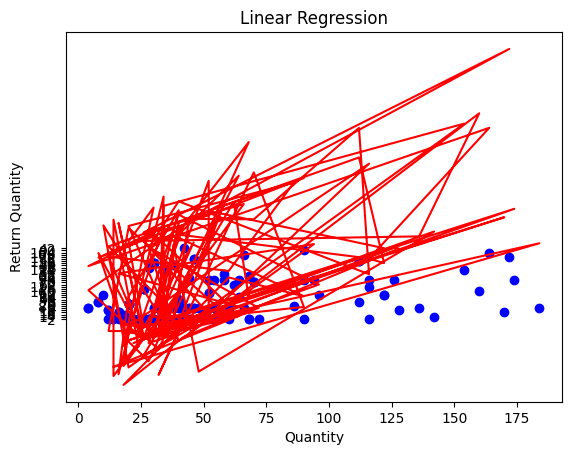

In [139]:
# create a scatter plot of the training data
y_test = y_test.iloc[:, 0]

plt.scatter(pd.Series(X_test['QUANTITY']), y_test, color='blue')

# add the regression line to the scatter plot
plt.plot(pd.Series(X_test['QUANTITY']), y_pred, color='red')

# add plot titles and labels
plt.title('Linear Regression')
plt.xlabel('Quantity')
plt.ylabel('Return Quantity')

# show the plot
plt.show()


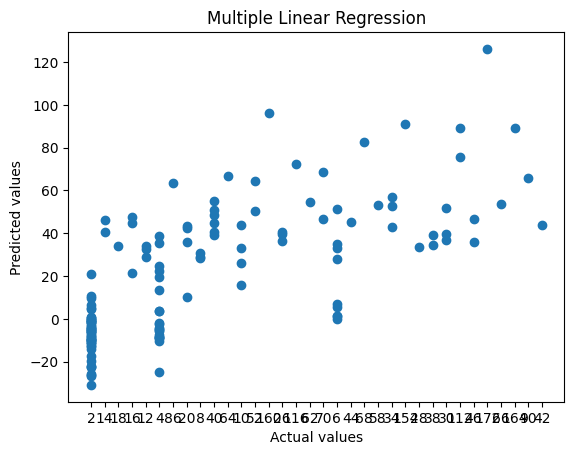

In [140]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)



# plot the actual vs predicted values for the testing set
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Multiple Linear Regression")
plt.show()